# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
telecom_users_df = pd.read_csv('telecom_users.csv')
telecom_users_df.drop(['Unnamed: 0'], axis=1, inplace=True)
telecom_users_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [3]:
telecom_users_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5986.000000,5986.000000,5986.000000
mean,0.161377,32.468760,64.802213
std,0.367909,24.516391,30.114702
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.650000
50%,0.000000,29.000000,70.400000
75%,0.000000,56.000000,89.900000
max,1.000000,72.000000,118.750000


In [4]:
telecom_users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
customerID          5986 non-null object
gender              5986 non-null object
SeniorCitizen       5986 non-null int64
Partner             5986 non-null object
Dependents          5986 non-null object
tenure              5986 non-null int64
PhoneService        5986 non-null object
MultipleLines       5986 non-null object
InternetService     5986 non-null object
OnlineSecurity      5986 non-null object
OnlineBackup        5986 non-null object
DeviceProtection    5986 non-null object
TechSupport         5986 non-null object
StreamingTV         5986 non-null object
StreamingMovies     5986 non-null object
Contract            5986 non-null object
PaperlessBilling    5986 non-null object
PaymentMethod       5986 non-null object
MonthlyCharges      5986 non-null float64
TotalCharges        5986 non-null object
Churn               5986 non-null object
dtypes: float64(1), int64(2), obj

Посчитать сколько клиентов ушло (1), сколько осталось (0)

In [5]:
telecom_users_df.groupby('Churn')['customerID'].count()

Churn
No     4399
Yes    1587
Name: customerID, dtype: int64

Количество клиентов женщин и мужчин

In [6]:
telecom_users_df.groupby('gender')['customerID'].count()

gender
Female    2936
Male      3050
Name: customerID, dtype: int64

In [7]:
print('Средняя стоимость услуг {}'.format(telecom_users_df['MonthlyCharges'].mean()))

Средняя стоимость услуг 64.80221349816237


In [8]:
print('Количество пользователей услуги онлайн-безопасности {}'.format(telecom_users_df['OnlineSecurity'][telecom_users_df['OnlineSecurity'] == 'Yes'].count()))

Количество пользователей услуги онлайн-безопасности 1713


In [9]:
print("Количество клиентов пенсионеров {}".format(telecom_users_df['SeniorCitizen'].sum()))

Количество клиентов пенсионеров 966


In [10]:
print('Количество клиентов на каждый интернет-провайдер')
telecom_users_df.groupby('InternetService')['InternetService'].count().to_frame()

Количество клиентов на каждый интернет-провайдер


,InternetService
InternetService,
DSL,2068
Fiber optic,2627
No,1291


In [11]:
print('Количество клиентов на каждый способ оплаты')
telecom_users_df.groupby('PaymentMethod')['PaymentMethod'].count().to_frame()

Количество клиентов на каждый способ оплаты


,PaymentMethod
PaymentMethod,
Bank transfer (automatic),1308
Credit card (automatic),1303
Electronic check,2006
Mailed check,1369


In [12]:
print('Количество клиентов на каждый тип контракта')
telecom_users_df.groupby('Contract')['Contract'].count().to_frame()

Количество клиентов на каждый тип контракта


,Contract
Contract,
Month-to-month,3269
One year,1276
Two year,1441


# 2. Исследование зависимостей и формулирование гипотез

**Заменить "Yes" и "No" на 1 и 0**

In [13]:
telecom_users_df = telecom_users_df.replace(to_replace=['No', 'Yes', 'No phone service', 'No internet service'], value=[0, 1, 0, 0])
telecom_users_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,1,1,72,1,1,0,0,...,0,0,0,0,Two year,0,Credit card (automatic),24.10,1734.65,0
1,9688-YGXVR,Female,0,0,0,44,1,0,Fiber optic,0,...,1,0,1,0,Month-to-month,1,Credit card (automatic),88.15,3973.2,0
2,9286-DOJGF,Female,1,1,0,38,1,1,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Bank transfer (automatic),74.95,2869.85,1
3,6994-KERXL,Male,0,0,0,4,1,0,DSL,0,...,0,0,0,1,Month-to-month,1,Electronic check,55.90,238.5,0
4,2181-UAESM,Male,0,0,0,2,1,0,DSL,1,...,1,0,0,0,Month-to-month,0,Electronic check,53.45,119.5,0


**Посчитать количество дополнительных услуг у каждого клиента. Допуслуги: *MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies*. А так же добавление колонки отображающий пользуется ли клиент допуслугами или нет.**

In [14]:
telecom_users_df['AdditionalService_count'] = telecom_users_df['MultipleLines'] + telecom_users_df['OnlineSecurity'] \
+ telecom_users_df['OnlineBackup'] + telecom_users_df['DeviceProtection'] + telecom_users_df['TechSupport'] \
+ telecom_users_df['StreamingTV'] + telecom_users_df['StreamingMovies']

telecom_users_df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AdditionalService_count
0,7010-BRBUU,Male,0,1,1,72,1,1,0,0,...,0,0,0,Two year,0,Credit card (automatic),24.10,1734.65,0,1
1,9688-YGXVR,Female,0,0,0,44,1,0,Fiber optic,0,...,0,1,0,Month-to-month,1,Credit card (automatic),88.15,3973.2,0,3
2,9286-DOJGF,Female,1,1,0,38,1,1,Fiber optic,0,...,0,0,0,Month-to-month,1,Bank transfer (automatic),74.95,2869.85,1,1
3,6994-KERXL,Male,0,0,0,4,1,0,DSL,0,...,0,0,1,Month-to-month,1,Electronic check,55.90,238.5,0,1
4,2181-UAESM,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,Month-to-month,0,Electronic check,53.45,119.5,0,2


In [15]:
telecom_users_df['AdditionalService'] = telecom_users_df['AdditionalService_count'].apply(lambda x: 0 if x == 0 else 1)
telecom_users_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AdditionalService_count,AdditionalService
0,7010-BRBUU,Male,0,1,1,72,1,1,0,0,...,0,0,Two year,0,Credit card (automatic),24.10,1734.65,0,1,1
1,9688-YGXVR,Female,0,0,0,44,1,0,Fiber optic,0,...,1,0,Month-to-month,1,Credit card (automatic),88.15,3973.2,0,3,1
2,9286-DOJGF,Female,1,1,0,38,1,1,Fiber optic,0,...,0,0,Month-to-month,1,Bank transfer (automatic),74.95,2869.85,1,1,1
3,6994-KERXL,Male,0,0,0,4,1,0,DSL,0,...,0,1,Month-to-month,1,Electronic check,55.90,238.5,0,1,1
4,2181-UAESM,Male,0,0,0,2,1,0,DSL,1,...,0,0,Month-to-month,0,Electronic check,53.45,119.5,0,2,1


**Проверить данные на наличие пустых значений.**

In [16]:
telecom_users_df.isnull().sum().sum()

0

**Создание функции для формирования графиков. Графики буду отражать долю клиентов с разными характеристиками в оттоке клиентов**

In [17]:
def show_bar_chart(column):
    
    #Сгруппировать датафрэйм по указаной колонке
    internet_service = telecom_users_df.groupby([column, 'Churn']).size().unstack(fill_value=0).reset_index()
    
    #Изьменить значени 0 на 'No Service' для удобства
    if column == 'PhoneService' or column == 'InternetService':
        internet_service.replace({0: 'No Service'}, inplace=True)
    
    #Получить название Ticks для оси x
    ticks = internet_service[column].tolist()
    
    fig = plt.figure(figsize=[8,6])
    #ax = plt.subplot(111)
    ax = fig.add_subplot(111)
    
    #Формирование данных для осей графика
    y1 = internet_service[1].astype(int).tolist() #Значения y по ушедшим клиентам
    y2 = internet_service[0].astype(int).tolist() #Значения y по оставшимся клиентам
    x = np.arange(len(internet_service[column])) #Значения x по количеству элементов в целевой колонке
    
    #Формирование графиков
    rects1 = ax.bar(x-0.1, y1, width=0.2, color='tab:blue', align='center') 
    rects2 = ax.bar(x+0.1, y2, width=0.2, color='tab:orange', align='center')
    
    def autolabel(rects, xpos='center'):
        
        #Добавить метку с высотой для кадждого столбца
       
        ha = {'center': 'center', 'right': 'left', 'left': 'right'}
        offset = {'center': 0, 'right': 1, 'left': -1}

        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(offset[xpos]*3, 3),  # use 3 points offset
                        textcoords="offset points",  # in both directions
                        ha=ha[xpos], va='bottom')


    autolabel(rects1, "left")
    autolabel(rects2, "right")
    
    #Атрибуты графика
    ax.set_title(column + ' role in customer retention')
    ax.set_xticks(x)
    ax.set_xticklabels(ticks)
    ax.legend(['Yes (Churn)', 'No (No churn)'], bbox_to_anchor=[1.2, .9], loc='center', ncol=1)
    
    ax.tick_params(axis='x', rotation=90)
    
    #убрать рамки у графика
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
      
    plt.show()

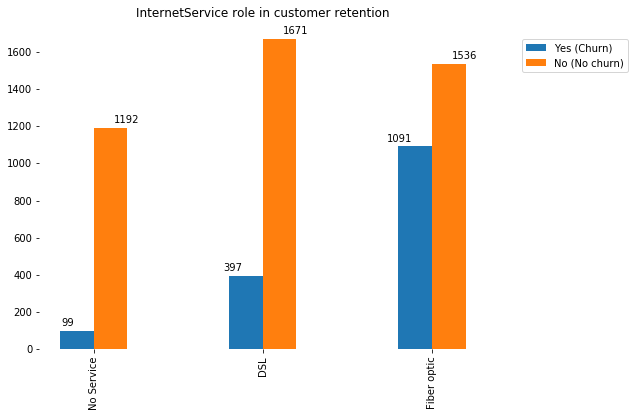

In [18]:
show_bar_chart('InternetService')

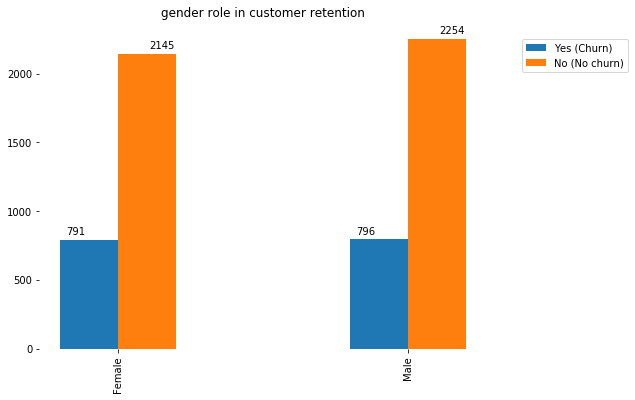

In [19]:
show_bar_chart('gender')

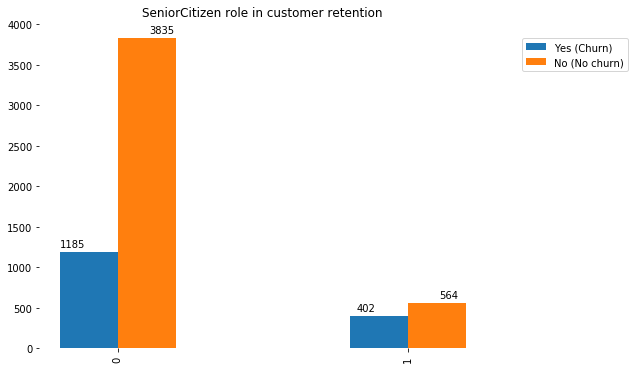

In [20]:
show_bar_chart('SeniorCitizen')

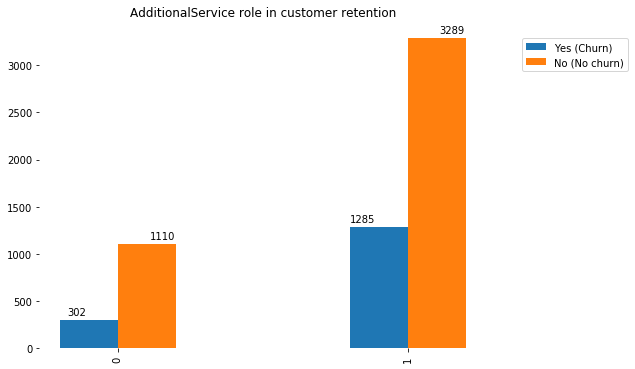

In [21]:
show_bar_chart('AdditionalService')

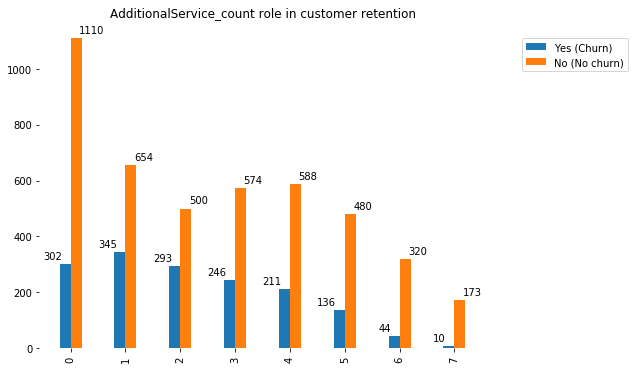

In [22]:
show_bar_chart('AdditionalService_count')

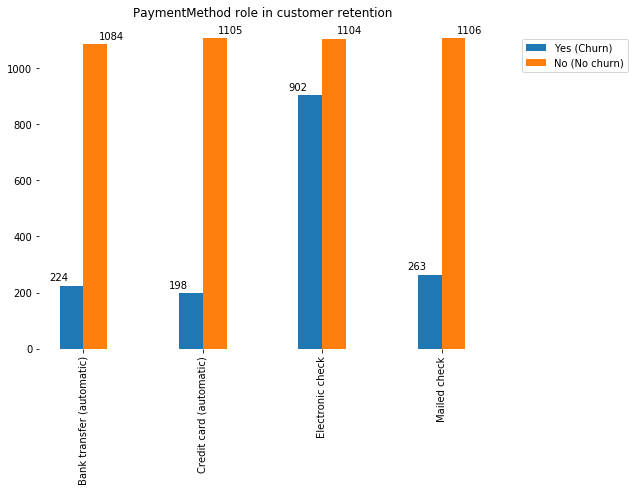

In [23]:
show_bar_chart('PaymentMethod')

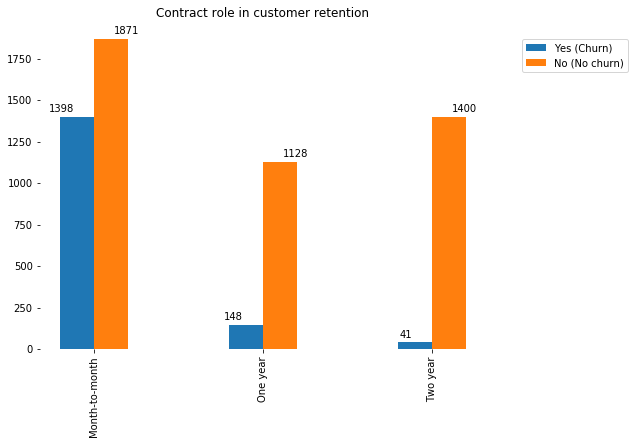

In [24]:
show_bar_chart('Contract')

**Есть ли зависимость длительности использования клиентом услуг компании и оттока клиентов**

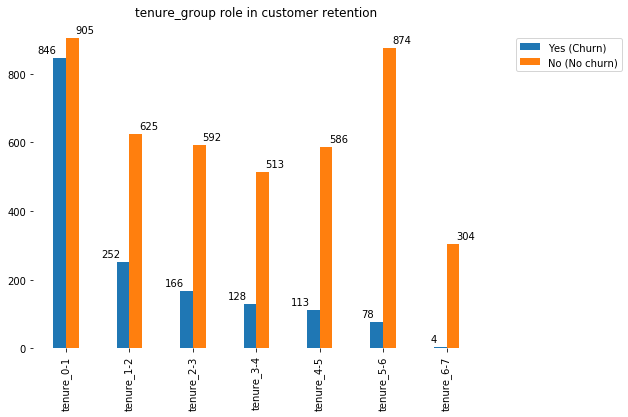

In [25]:
#Сформировать колонку tenure_group - группы по длительности использования услуг с периодом 1 год
def get_group(row):
    
    group = 'tenure_{}-{}'.format(row//12, row//12+1)
    return group

telecom_users_df['tenure_group'] = telecom_users_df['tenure'].apply(get_group)
show_bar_chart('tenure_group')

****Есть ли зависимость между количеством дополнительных услуг (AdditionalService_count) и временем пользования клиентом услуг компании (tenure_group)****

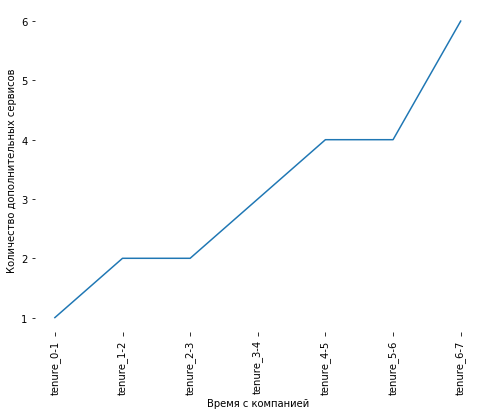

In [26]:
tenure_add_ser = telecom_users_df.groupby('tenure_group')['AdditionalService_count'].median().to_frame().reset_index()

fig = plt.figure(figsize=[8,6])
ax = fig.add_subplot(111)

x = tenure_add_ser['tenure_group']
y = tenure_add_ser['AdditionalService_count']
    
#формирование графика
ax.plot(x, y)
    
#параметры ticks
plt.tick_params(axis='x', rotation=90, grid_alpha=3)

#наименование осей
ax.set_xlabel('Время с компанией')
ax.set_ylabel('Количество дополнительных сервисов')
#убрать рамки графика
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

# 3. Построение моделей для прогнозирования оттока

**Подготовить данные для построение моделей**

In [27]:
#Выбрать данные для построения модели
telecom_users_df = telecom_users_df.replace(to_replace=['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)', 'DSL', 'Fiber optic', 'Month-to-month', 'One year', 'Two year'], value=[1, 2, 3, 4, 1, 2, 1, 2, 3])

telecom = telecom_users_df.drop(['customerID', 'gender', 'SeniorCitizen', 'tenure_group', 'Churn', 'AdditionalService'], axis=1)#.replace(' ',0)

target = telecom_users_df['Churn']

telecom.head()

,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,AdditionalService_count
0,1,1,72,1,1,0,0,0,0,0,0,0,3,0,4,24.10,1734.65,1
1,0,0,44,1,0,2,0,1,1,0,1,0,1,1,4,88.15,3973.2,3
2,1,0,38,1,1,2,0,0,0,0,0,0,1,1,3,74.95,2869.85,1
3,0,0,4,1,0,1,0,0,0,0,0,1,1,1,1,55.90,238.5,1
4,0,0,2,1,0,1,1,0,1,0,0,0,1,0,1,53.45,119.5,2


In [28]:
telecom['TotalCharges'][telecom['TotalCharges'] == ' '] = telecom['tenure'] * telecom['MonthlyCharges']
telecom.head()

,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,AdditionalService_count
0,1,1,72,1,1,0,0,0,0,0,0,0,3,0,4,24.10,1734.65,1
1,0,0,44,1,0,2,0,1,1,0,1,0,1,1,4,88.15,3973.2,3
2,1,0,38,1,1,2,0,0,0,0,0,0,1,1,3,74.95,2869.85,1
3,0,0,4,1,0,1,0,0,0,0,0,1,1,1,1,55.90,238.5,1
4,0,0,2,1,0,1,1,0,1,0,0,0,1,0,1,53.45,119.5,2


**Предсказание оттока это проблема классификации и для построения моделей будем использовать *Decision Trees, Logistic Rgression, k-means и Random Forest*.**

In [29]:
#Импорт библиотек
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import (train_test_split, GridSearchCV, StratifiedKFold)

In [30]:
#Получить лучшие параметры для моделей
def get_params(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv):
    
    gs = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv)
    fitted_model = gs.fit(X_train_data, y_train_data)
  
    return fitted_model.best_params_

In [31]:
#Набор параметров для последующей выборки оптимальных для каждой модели
#Logistic Regression
lr_params = {'C': np.arange(0.5, 1, 0.1)}

#DecisionTreeClassifier
dtc_params = {'criterion': ['gini','entropy'], 'max_depth' : [3,5,7,20]}

#KMeans
km_params = {'max_iter': [200, 300, 400], 'n_init': [5, 10, 20]}

#RandomForestClassifier
rfc_params = {'n_estimators': list(range(10, 100, 10)), 'min_samples_leaf': list(range(1, 5))}

skf = StratifiedKFold(n_splits=5, random_state=17)

In [32]:
#Разделить данные тестовую и тренировочную выборки
x_train, x_test, y_train, y_test = train_test_split(telecom, target, test_size=0.7, random_state=17)

**Найти оптимальные параметры для моделей**

In [33]:
dtc_best_params = get_params(x_train, x_test, y_train, y_test, DecisionTreeClassifier(random_state=17), dtc_params, cv=skf)
dtc_best_params

{'criterion': 'gini', 'max_depth': 3}

In [34]:
km_best_params = get_params(x_train, x_test, y_train, y_test, KMeans(random_state=17), km_params, cv=skf)
km_best_params

{'max_iter': 200, 'n_init': 10}

In [35]:
rfc_best_params = get_params(x_train, x_test, y_train, y_test, RandomForestClassifier(random_state=17), rfc_params, cv=skf)
rfc_best_params

{'min_samples_leaf': 4, 'n_estimators': 40}

In [36]:
lr_best_params = get_params(x_train, x_test, y_train, y_test, LogisticRegression(random_state=17), lr_params, cv=skf)
lr_best_params

{'C': 0.7}

**Построение моделей**

In [37]:
#Logistic Regression
lr_model = LogisticRegression(C=lr_best_params['C'], random_state=17).fit(x_train, y_train)
lr_pred = lr_model.predict(x_test)
lr_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [45]:
lr_pred_proba = lr_model.predict_proba(x_test)
lr_pred_proba

array([[0.86084577, 0.13915423],
       [0.98150476, 0.01849524],
       [0.78373825, 0.21626175],
       ...,
       [0.6386191 , 0.3613809 ],
       [0.79637505, 0.20362495],
       [0.25794754, 0.74205246]])

In [38]:
#DecisionTreeClassifier
dtc_model = DecisionTreeClassifier(criterion = dtc_best_params['criterion'], max_depth = dtc_best_params['max_depth'], random_state=17).fit(x_train, y_train)
dtc_pred = dtc_model.predict(x_test)
dtc_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [46]:
dtc_pred_proba = dtc_model.predict_proba(x_test)
dtc_pred_proba

array([[0.75      , 0.25      ],
       [0.92753623, 0.07246377],
       [0.75      , 0.25      ],
       ...,
       [0.58053691, 0.41946309],
       [0.75      , 0.25      ],
       [0.30232558, 0.69767442]])

In [39]:
#KMeans
km_model = KMeans(max_iter = km_best_params['max_iter'], n_clusters = 2, n_init = km_best_params['n_init'], random_state=17).fit(x_train, y_train)
km_pred = km_model.predict(x_test)
km_pred

array([0, 1, 0, ..., 1, 0, 1])

In [40]:
#RandomForestClassifier
rfc_model = RandomForestClassifier(min_samples_leaf = rfc_best_params['min_samples_leaf'], n_estimators = rfc_best_params['n_estimators'], random_state=17).fit(x_train, y_train)
rfc_pred = rfc_model.predict(x_test)
rfc_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [48]:
rfc_pred_proba = rfc_model.predict_proba(x_test)
rfc_pred_proba

array([[0.64059597, 0.35940403],
       [1.        , 0.        ],
       [0.72311711, 0.27688289],
       ...,
       [0.59243486, 0.40756514],
       [0.64848967, 0.35151033],
       [0.26343434, 0.73656566]])

# 4. Сравнение качества моделей 

**Для оценки качества моеделй будем использовать *AUC и accuracy*.**

In [41]:
from sklearn.metrics import accuracy_score, roc_auc_score

In [42]:
print('Logistic Regression accuracy score {}'.format(accuracy_score(y_test, lr_pred)))
print('DecisionTreeClassifier accuracy score {}'.format(accuracy_score(y_test, dtc_pred)))
print('KMeans accuracy score {}'.format(accuracy_score(y_test, km_pred)))
print('RandomForestClassifier accuracy score {}'.format(accuracy_score(y_test, rfc_pred)))

Logistic Regression accuracy score 0.7947983774755428
DecisionTreeClassifier accuracy score 0.7928895251729897
KMeans accuracy score 0.47244094488188976
RandomForestClassifier accuracy score 0.8012407539966595


In [53]:
print('Logistic Regression accuracy score {}'.format(roc_auc_score(y_test, lr_pred_proba[:,1])))
print('DecisionTreeClassifier accuracy score {}'.format(roc_auc_score(y_test, dtc_pred_proba[:,1])))
print('KMeans accuracy score {}'.format(roc_auc_score(y_test, km_pred)))
print('RandomForestClassifier accuracy score {}'.format(roc_auc_score(y_test, rfc_pred_proba[:,1])))

Logistic Regression accuracy score 0.8370352671881822
DecisionTreeClassifier accuracy score 0.8218950951588735
KMeans accuracy score 0.5868531202435312
RandomForestClassifier accuracy score 0.8357074380847874


**Оптимальной моделью для предсказания оттока клиентов оказалась RandomForestClassifier и LogisticRegression**